# ***SVM - Support Vector Machine***



# **Import Libraries and Load Data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv('/content/Student_performance_data _.csv')

# **Preprocess Data:**


In [ ]:
X = data[['GPA', 'StudyTimeWeekly']].values
y = data['GradeClass'].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **Train the SVM Model:**

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)



# **Evaluate the Model:**

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 89.83%
Confusion Matrix:
 [[ 12   9   4   3   5]
 [  0  70   3   2   5]
 [  0   5 105   6   5]
 [  0   2   4 108  13]
 [  0   2   0   5 350]]


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.36      0.53        33
         1.0       0.80      0.88      0.83        80
         2.0       0.91      0.87      0.89       121
         3.0       0.87      0.85      0.86       127
         4.0       0.93      0.98      0.95       357

    accuracy                           0.90       718
   macro avg       0.90      0.79      0.81       718
weighted avg       0.90      0.90      0.89       718



# **Plot Decision Boundaries:**

In [ ]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('GPA')
    plt.ylabel('Study Time Weekly')
    plt.title('SVM Decision Boundary')
    plt.show()

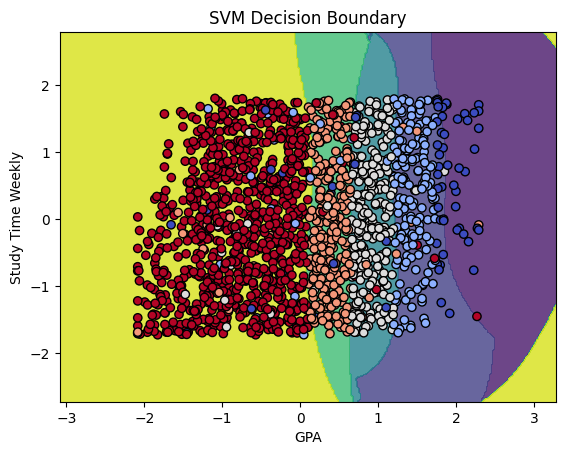

In [ ]:
plot_decision_boundary(X_train, y_train, svm_model)